<a href="https://colab.research.google.com/github/annywillow/Data/blob/main/Heart_disease_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#Data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeLinq
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# import pandas_profiling as pp
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
data_frame = pd.read_csv("heartdiseasedataset.csv")

In [ ]:
data_frame

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data_frame.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#let's check the distribution of our dependent varaible
data_frame['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:>

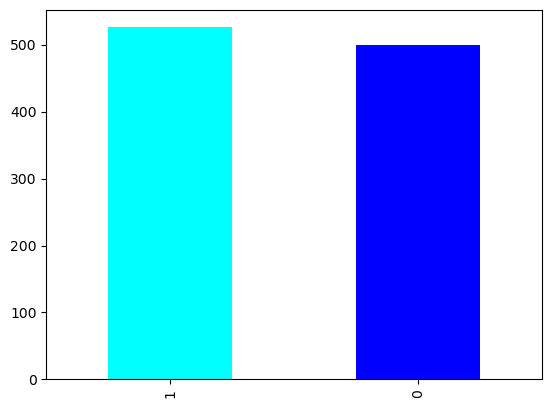

In [ ]:
#let's check the distribution of our dependent varaible
data_frame.target.value_counts().plot(kind="bar", color=["cyan", "blue"])

<h3>From the chart above it can be seen that the data is balanced, We have 526 people with heart disease and 499 people without heart disease, so our problem is balanced. Now let's split the dataset into categorical and continous for more visualization

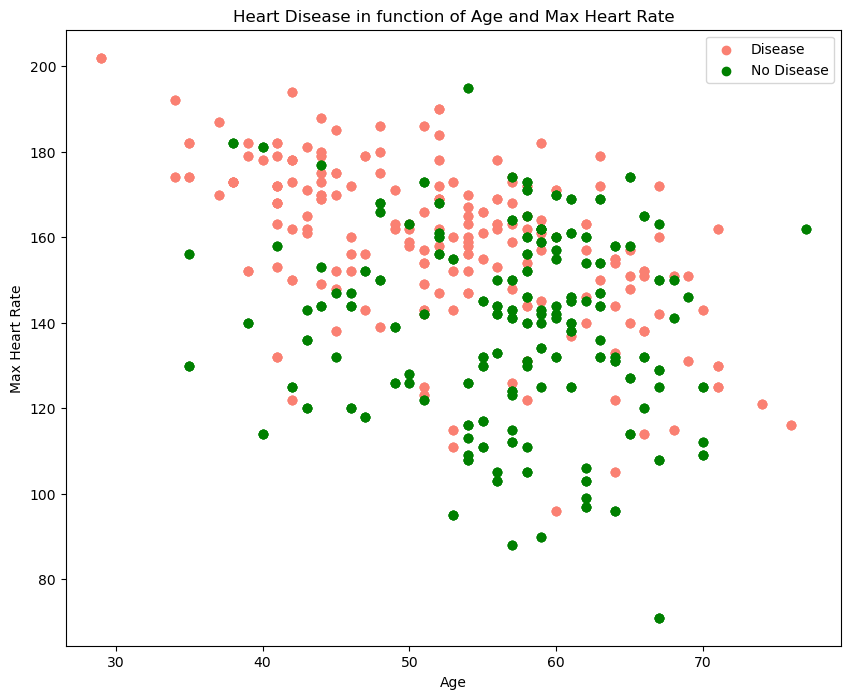

In [ ]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data_frame.age[data_frame.target==1],
            data_frame.thalach[data_frame.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data_frame.age[data_frame.target==0],
            data_frame.thalach[data_frame.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [ ]:
# the syntax here means if the data lenght is less than or equal to 10 it should insert the vairable inside categorical otherwisise continous
categorical_val = []
continous_val = []
for column in data_frame.columns:
    print('==============================')
    print(f"{column} : {data_frame[column].unique()}")
    if len(data_frame[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

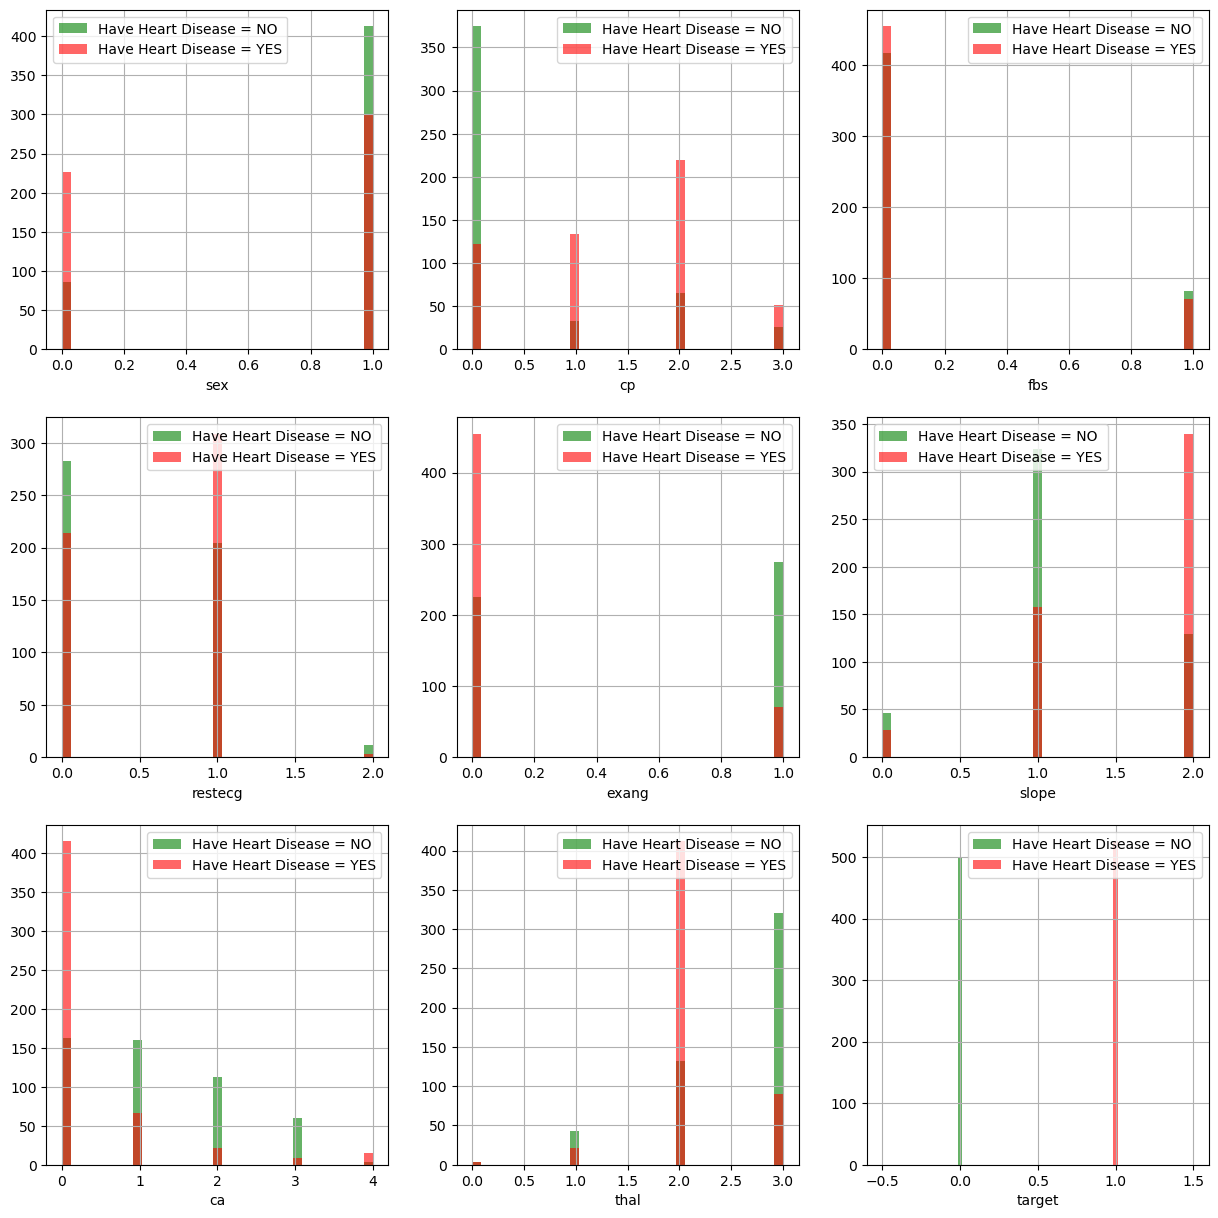

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data_frame[data_frame["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    data_frame[data_frame["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

Chest pain (cp): Individuals with chest pain values of 1, 2, or 3 are at a higher risk of having heart disease than those with a cp value of 0.

Resting EKG results (restecg): Those who have an abnormal heart rhythm (restecg = 1) are more likely to have heart disease than those with a normal heart rhythm.

Exercise-induced angina (exang): People without angina induced by exercise (exang = 0) are more susceptible to heart disease than those with exercise-induced angina (exang = 1).

The slope of the ST segment of peak exercise (slope): Individuals with a slope value of 2 (downsloping) are more likely to have heart disease than those with a slope value of 0 (upsloping) or 1 (flatsloping), which are typical of a healthy heart.

Number of major vessels (0-3) stained by fluoroscopy (ca): A higher number of major vessels with blood flow is associated with better health, so individuals with ca = 0 are more likely to have heart disease.

Thalium stress result (thal): Individuals with a thal value of 2 (defect corrected) are more likely to have heart disease, despite their corrected defect.

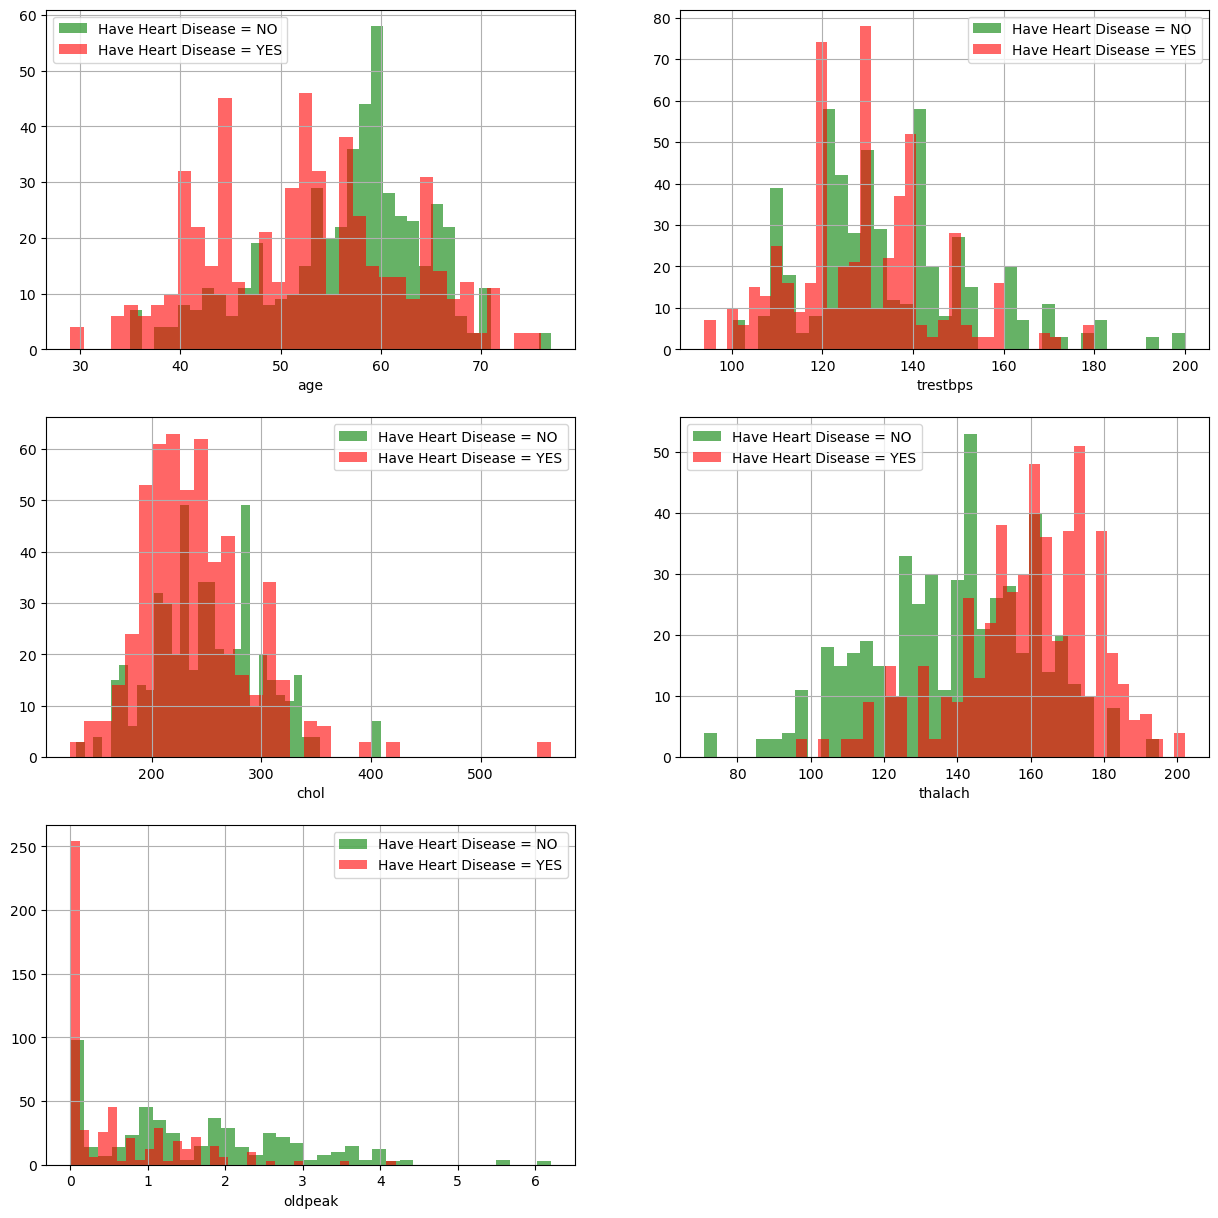

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data_frame[data_frame["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    data_frame[data_frame["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

The plot above provides the following observations:

Resting blood pressure (trestbps) should ideally be between 120-140mm/Hg. Anything above this range is a cause for concern.
Total cholesterol levels (chol) above 200 are also a cause for concern.
People with a maximum heart rate (thalach) over 140 are more likely to have heart disease.
The comparison of ST depression induced by exercise to rest (old peak) can indicate the level of heart stress during exercise. An unhealthy heart tends to experience more stress during exercise than a healthy heart.

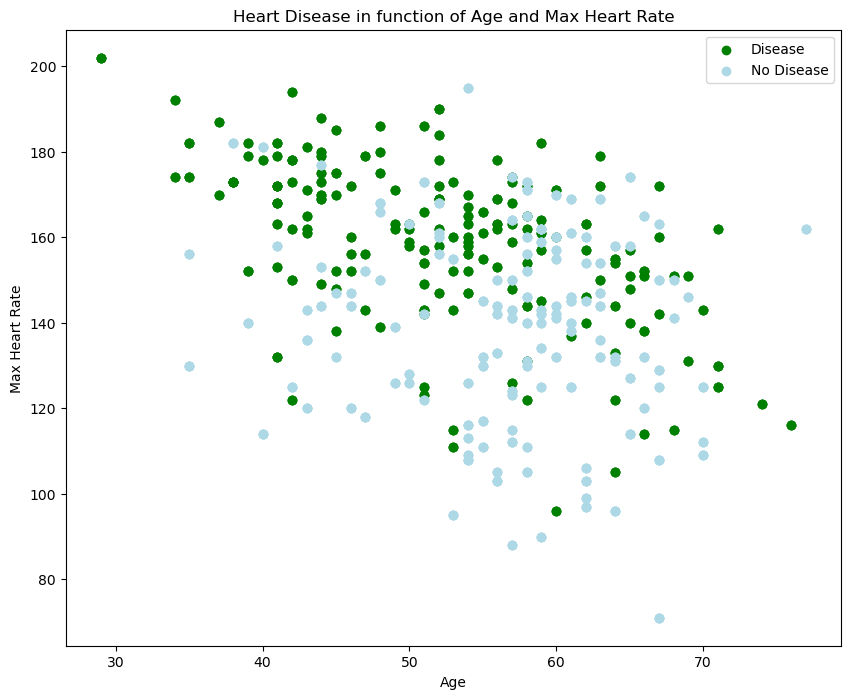

In [ ]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data_frame.age[data_frame.target==1],
            data_frame.thalach[data_frame.target==1],
            c="green")

# Scatter with negative examples
plt.scatter(data_frame.age[data_frame.target==0],
            data_frame.thalach[data_frame.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

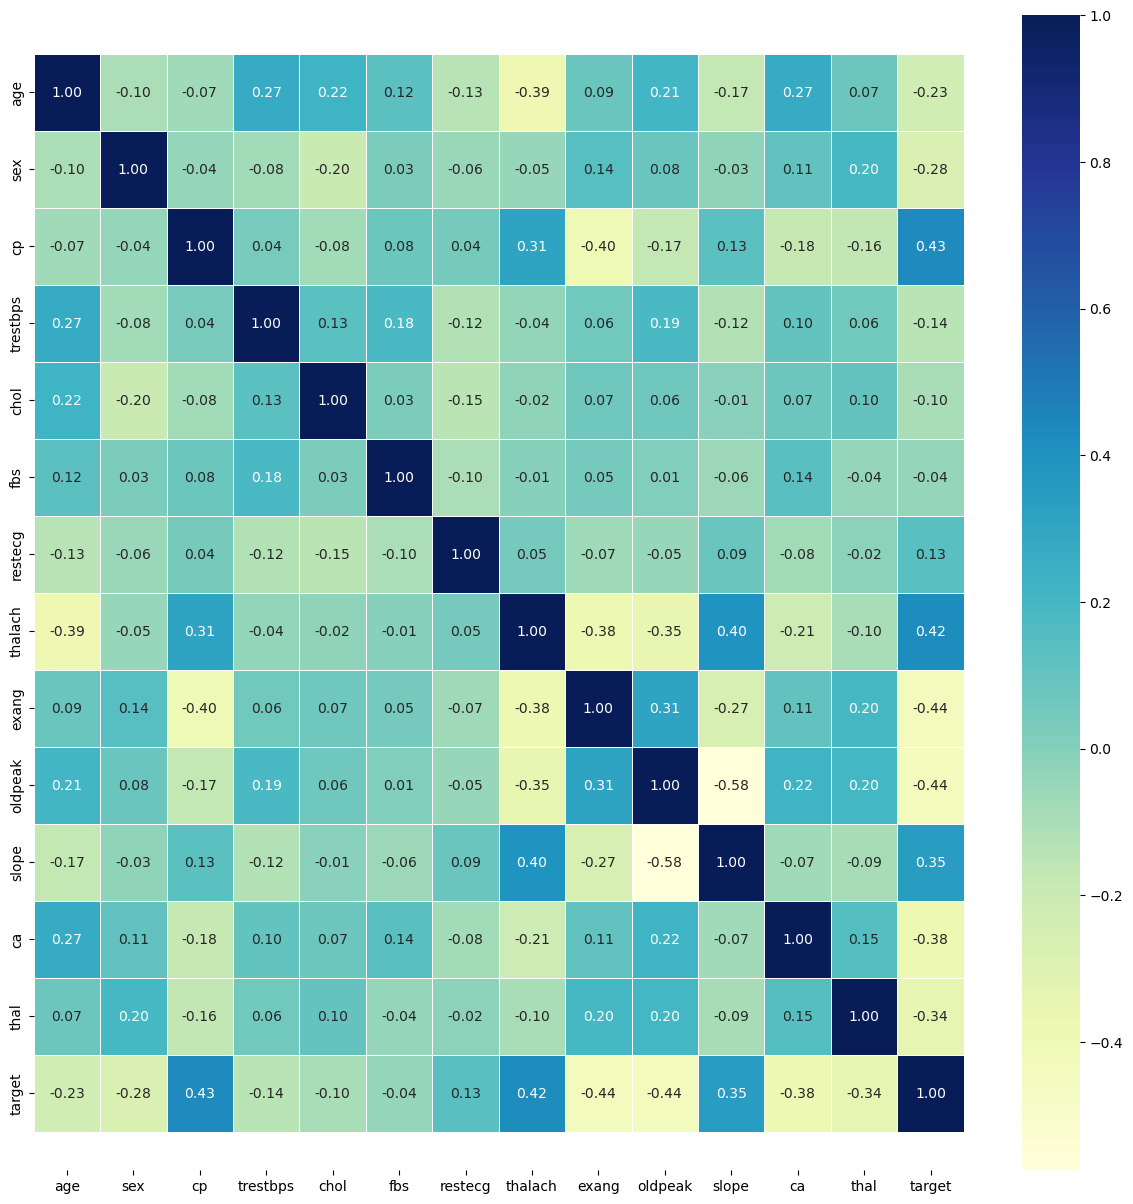

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = data_frame.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

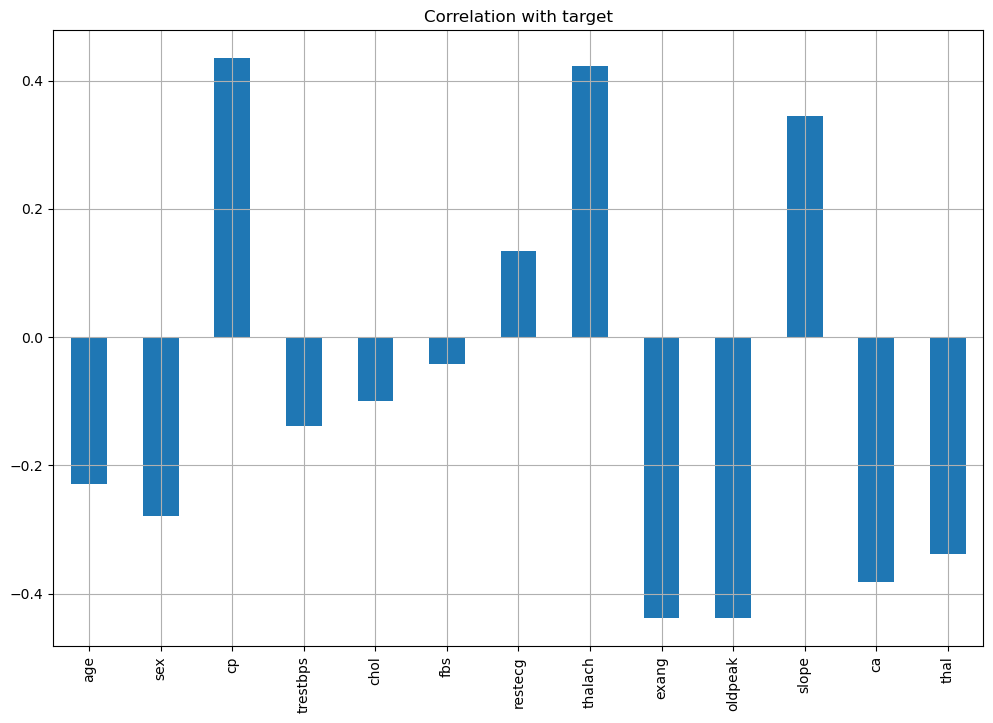

In [ ]:
data_frame.drop('target', axis=1).corrwith(data_frame.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [ ]:
y = data_frame["target" ]
X = data_frame.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
#normalizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#The training info
print('X_Train Shape',X_train.shape)
print('Y_Train Shape',y_train.shape)
print('X_Test Shape',X_test.shape)
print('Y_Test Shape',y_test.shape)

X_Train Shape (820, 13)
Y_Train Shape (820,)
X_Test Shape (205, 13)
Y_Test Shape (205,)


In [ ]:
#The final data set
pd.set_option('display.max_columns',None)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [ ]:
model1= 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print ("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print (classification_report(y_test,lr_predicted))

confusion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
model2= 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=2, max_depth =5 )
model = rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print ("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print (classification_report(y_test,rf_predicted))

confusion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest Classifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
model3 = 'Support Vector Classifier'
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print ("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print (classification_report(y_test,svc_predicted))

confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



When compared to other classification models, the Support Vector Classifier has the highest accuracy rate of 98% with zero false negatives. I conducted a test with a new dataset by inputting the parameters into the predictive system, and the results were accurate and reliable.

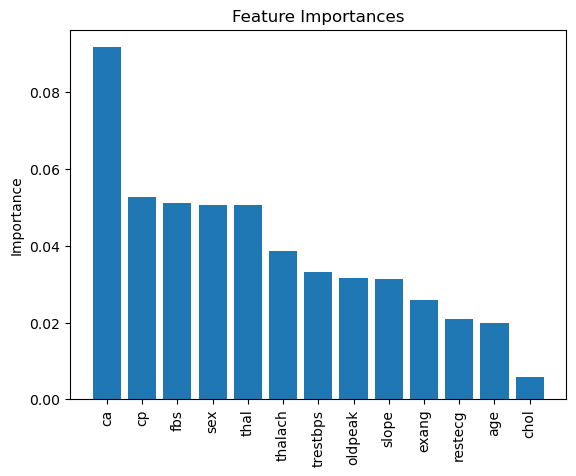

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svc, X_test, y_test, n_repeats=10, random_state=0)
importance_scores = result.importances_mean

# If X_train is a NumPy array, pass the feature names separately as a list of strings
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

feature_importances = dict(zip(feature_names, importance_scores))

# Sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances as a bar graph
plt.bar(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.xticks(range(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.show()


<h1>Let's Tune the parameter for SVC to see if we can get a better result 

In [ ]:
from sklearn.model_selection import GridSearchCV
m6 = 'Support Vector Classifier'
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(X_train, y_train)
best_params = svc_grid.best_params_
svc_final = SVC(kernel=best_params['kernel'], C=best_params['C'])
svc_final.fit(X_train, y_train)
svc_predicted = svc_final.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Results of", m6)
print("Best parameters:", best_params)
print("Confusion matrix:")
print(svc_conf_matrix)
print("Accuracy of Support Vector Classifier:", svc_acc_score*100)
print("Classification report:")
print(classification_report(y_test, svc_predicted))


Results of Support Vector Classifier
Best parameters: {'C': 10, 'kernel': 'rbf'}
Confusion matrix:
[[ 98   0]
 [  0 107]]
Accuracy of Support Vector Classifier: 100.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



The first result shows an accuracy score of 98.05% which is already a good score, but after applying GridSearchCV for parameter tuning, the accuracy increased to 100%. This means that the model's hyperparameters were tuned to their optimal values resulting in a better prediction. The confusion matrix of the tuned model shows that there are no false negatives or false positives. This implies that the model can correctly identify all individuals who have heart disease and those who don't. The precision and recall scores for both classes are also perfect at 1.0, indicating that the model's performance is excellent. Therefore, the parameter tuning has significantly improved the performance of the Support Vector Classifier, and it is ready for deployment.

According to the analysis of the dataset, the most important variable to consider is CP or Chest Pain. Chest pain is a critical symptom of heart disease, and it's important to identify it early for timely treatment. Other variables in the dataset such as resting EKG results (restecg), exercise-induced angina (exang), slope of the ST segment of peak exercise (slope), number of major vessels (ca), and thallium stress test result (thal) are also essential for predicting the presence of heart disease. It's important to note that different variables may have varying degrees of importance depending on the individual patient and their medical history. Therefore, it's critical to consider all variables and perform a thorough analysis to accurately diagnose and treat heart disease.

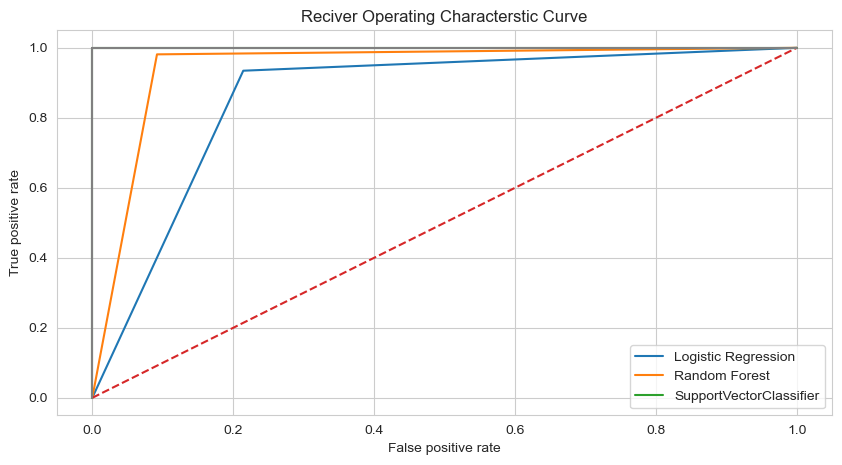

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold=roc_curve(y_test,rf_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test, svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate, label='Random Forest')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='SupportVectorClassifier')
plt.plot([0,1],ls= '--')
plt.plot([0,0], [1,0], c='.5')
plt.plot ([1,1], c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                           rf_acc_score*100,svc_acc_score*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,94.634146
2,Support Vector Machine,100.000000


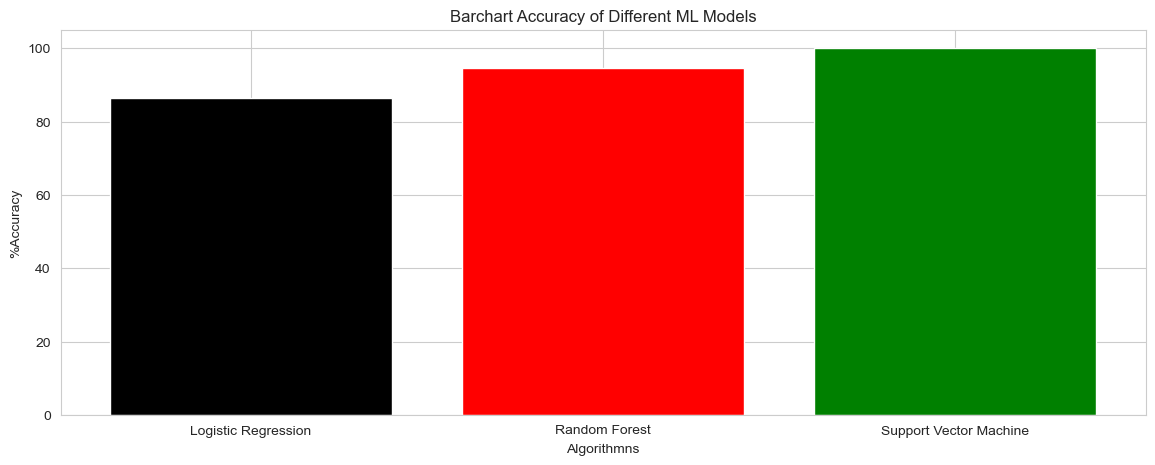

In [ ]:
colors = ['black','red', 'green', 'yellow' , 'cyan' , 'magenta', 'orange']
plt.figure(figsize=(14,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithmns")
plt.ylabel("%Accuracy" )
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()